In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import random

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Stock Forecast/ticker_list.csv")
df

Mounted at /content/drive


,Symbol,Sector
0,RELIANCE,Energy
1,TCS,Technology
2,HDFCBANK,Financial Services
3,ICICIBANK,Financial Services
4,HINDUNILVR,Consumer Defensive
...,...,...
2132,VIKASPROP,NaN
2133,VISUINTL,NaN
2134,VIVIMEDLAB,Healthcare
2135,WINSOME,Consumer Cyclical


In [ ]:
df=df.dropna()

In [ ]:
df['Sector'].unique()

array(['Energy', 'Technology', 'Financial Services', 'Consumer Defensive',
       'Communication Services', 'Industrials', 'Basic Materials',
       'Consumer Cyclical', 'Healthcare', 'Utilities', 'Real Estate',
       'Consumer Goods'], dtype=object)

In [ ]:
ticker = "RELIANCE"

In [ ]:
# sector=str(df[df['Symbol']==ticker]['Sector'].values[0])

In [ ]:
# similar_company=list(df[df['Sector']==sector]['Symbol'].values)

In [ ]:
# similar_company.remove(ticker)

In [ ]:
# similar_company
# feature_companies = [random.choices(similar_company)[0] for i in range(5)]

In [ ]:
feature_companies

['HINDOILEXP', 'HINDPETRO', 'ALPHAGEO', 'OIL', 'MERCATOR']

In [ ]:
company = ticker
data = yf.Ticker(company+".NS").history(period="6y",interval='3mo').iloc[::-1,:5].add_suffix(" ("+company+")")
for i in feature_companies:
    company = i
    data = pd.merge(data,yf.Ticker(company+".NS").history(period="6y").iloc[::-1,:5].add_suffix(" ("+company+")")
                   ,on='Date',how='inner')

In [ ]:
# data.reset_index(inplace=True)
data = data[::-1].iloc[:,:5]
data

,Open (RELIANCE),High (RELIANCE),Low (RELIANCE),Close (RELIANCE),Volume (RELIANCE)
Date,,,,,
2018-08-01 00:00:00+05:30,1157.011572,1291.724144,987.891931,1031.484009,609949968
2018-11-01 00:00:00+05:30,1037.947599,1229.227739,1020.549643,1192.730957,535190808
2019-02-01 00:00:00+05:30,1199.388680,1372.784936,1172.174045,1353.734619,533053681
2019-08-01 00:00:00+05:30,1130.769041,1447.868407,1064.579078,1423.277954,590440766
2019-11-01 00:00:00+05:30,1422.021550,1580.887285,1375.305048,1379.654175,543451341
2021-02-01 00:00:00+05:30,1841.369734,2210.257543,1830.080254,1975.159668,586253178
2021-11-01 00:00:00+05:30,2519.736054,2585.256594,2232.468855,2371.060547,407142035
2022-02-01 00:00:00+05:30,2392.321161,2837.553094,2165.805702,2772.082275,397117722
2022-08-01 00:00:00+05:30,2502.747338,2659.470204,2295.952731,2532.999268,321896366


In [ ]:
# len(data.columns)

In [ ]:
# data.iloc[:,[0,1]].plot(0,1)
# data.iloc[:,[0,6]].plot(0,1)
# data.iloc[:,[0,11]].plot(0,1)
# data.iloc[:,[0,16]].plot(0,1)

In [ ]:
test_size = 0.4
X_train=data.iloc[:-round(len(data)*test_size)]
X_test = data.iloc[round(len(data)*test_size):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length=6
batch_size=1
generator = TimeseriesGenerator(X_train,X_train,length=2,batch_size=batch_size)



In [ ]:
len(X_train)

8

In [ ]:
X,y=generator[0]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
n_features = len(data.columns)

In [ ]:
model = Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(5))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=50)

Epoch 1/50


<ipython-input-22-179dd4066f56>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=50)


6/6 [==============================] - 2s 5ms/step - loss: 0.3502
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3156
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2766
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2474
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2195
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.1680
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1402
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1146
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 11/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 12/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0789
Epoch 13/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0734
Epoch 

In [ ]:
X_train[-5:].shape

(5, 5)

In [ ]:
true_pred=[]
current_batch = X_train[-length:].reshape(1,length,n_features)

for i in range(len(X_test)):
  current_pred = model.predict(current_batch)[0]
  true_pred.append(current_pred)
  current_batch = np.append(current_batch[:,1:,],[[current_pred]],axis=1)




1/1 [==============================] - 0s 36ms/step


<Axes: >

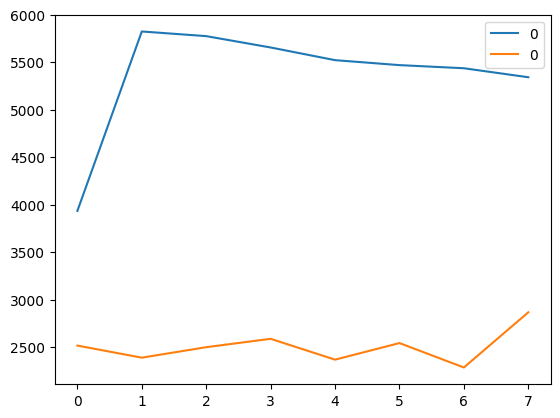

In [ ]:
pd.concat([pd.DataFrame(scaler.inverse_transform(true_pred))[0],pd.DataFrame(scaler.inverse_transform(X_test))[0]],axis=1).plot()

In [ ]:
# scaler.inverse_transform(X_test)
X_test

array([[ 1.        ,  0.84313093,  1.        ,  0.76960696,  0.0470996 ],
       [ 0.91401276,  1.        ,  0.9464371 ,  1.        ,  0.        ],
       [ 0.98853499,  0.88927434,  1.0510084 ,  0.8626432 , -0.35343026],
       [ 1.04799055,  0.9426417 ,  1.04855589,  0.75495907, -0.32691664],
       [ 0.90001027,  0.76222117,  0.95167631,  0.79311565,  0.00669856],
       [ 1.01772877,  0.83595075,  0.98394288,  0.71720307,  0.06330534],
       [ 0.84438659,  1.05123146,  1.03433383,  1.04663208, -0.17474586],
       [ 1.23637918,  1.0697912 ,  1.48500919,  1.07363429, -1.6900213 ]])

In [ ]:
pd.DataFrame(scaler.inverse_transform(true_pred))

,0,1,2,3,4
0,3937.744746,4801.044495,3907.225728,5555.858687,8.079016e+08
1,5826.226741,6274.839773,5239.926495,7099.125844,2.935092e+08
2,5777.205143,6366.718957,5091.653350,7649.076022,1.713960e+08
3,5657.747169,6374.226999,5042.190493,7811.757875,1.506101e+08
4,5524.319918,6288.046718,4964.969706,7826.233175,1.397844e+08
5,5472.064341,6257.378782,4949.261103,7882.389337,1.367814e+08
6,5439.142688,6235.797955,4952.200216,7929.146369,1.343663e+08
7,5344.365974,6117.545910,4899.384603,7807.480978,1.273596e+08


In [ ]:
pd.DataFrame(scaler.inverse_transform(X_test))

,0,1,2,3,4
0,2519.736054,2585.256594,2232.468855,2371.060547,407142035.0
1,2392.321161,2837.553094,2165.805702,2772.082275,397117722.0
2,2502.747338,2659.470204,2295.952731,2532.999268,321896366.0
3,2590.847898,2745.302292,2292.900390,2345.564453,327539320.0
4,2371.572425,2455.127367,2172.326307,2411.979736,398543392.0
5,2546.006334,2573.708526,2212.484535,2279.846436,410591140.0
6,2289.149902,2919.949951,2275.199951,2853.250000,359926168.0
7,2870.000000,2949.800049,2836.100098,2900.250000,37426692.0


In [ ]:
a = scaler.inverse_transform(model.predict(X_train[-length:].reshape(1,length,n_features)))

1/1 [==============================] - 0s 23ms/step
